# Evaluation-2 (FoDS)
- Name : Aravind S
- Roll : CB.EN.U4CSE20208

In [42]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

## Part A

#### Question-1
- Null Hypothesis (H0) : Mendal claims that for any given random sample, the ratio of purple to white flowers is 3:1
- Alternate Hypothese (Ha) : For a given sample, the ratio of puple to white flowers is not 3:1

#### Question-2
- I recommed taking the simulations for the given set sample and then checking if the outcome matches the claim, that is whether purple flowering % is around 75

#### Question-3

Basic details
- Roll No. = 208
- Total No. of Purple flowers : (705+8) = 713
- Total No. of White flowers : (929-713) = 216
- Total No. of simulations to be perforemd = (2000-208) = 1792

In [15]:
# creating the dataset
arr = []

for i in range(0,713):
    arr.append('Purple')
    
for i in range(0,216):
    arr.append('White')
               
len(arr)

929

In [21]:
df = pd.DataFrame(arr, columns=["Flower"])
df

,Flower
0,Purple
1,Purple
2,Purple
3,Purple
4,Purple
...,...
924,White
925,White
926,White
927,White


In [22]:
# taking random value, since it is not given
random_sample_size = 100

In [35]:
no_of_simulations = 1792

In [30]:
flowers_only = df["Flower"]
flowers_only

0      Purple
1      Purple
2      Purple
3      Purple
4      Purple
        ...  
924     White
925     White
926     White
927     White
928     White
Name: Flower, Length: 929, dtype: object

In [32]:
# one simulation
simulation1 = flowers_only.sample(n=100,replace=False)
simulation1

337    Purple
48     Purple
388    Purple
548    Purple
3      Purple
        ...  
149    Purple
872     White
862     White
855     White
810     White
Name: Flower, Length: 100, dtype: object

In [33]:
def getCountInPercent(sampled):
    purple, white = 0,0

    for i in sampled:
        if i == "Purple" :
            purple+=1
        else:
            white+=1
            
    total = purple+white
    p = (purple/total) * 100
    w = (white/total) * 100
            
    return [p,w]

In [34]:
getCountInPercent(simulation1)

[76.0, 24.0]

In [37]:
sample_simulations = []
for i in range(no_of_simulations):
    s = flowers_only.sample(n=100,replace=False)
    li = getCountInPercent(s)
    sample_simulations.append(li)
    
sample_simulations[:10]

[[76.0, 24.0],
 [79.0, 21.0],
 [78.0, 22.0],
 [76.0, 24.0],
 [78.0, 22.0],
 [84.0, 16.0],
 [81.0, 19.0],
 [76.0, 24.0],
 [75.0, 25.0],
 [73.0, 27.0]]

In [40]:
sample_simulations_df = pd.DataFrame(sample_simulations, columns = ["Purple %", "White %"])
sample_simulations_df

,Purple %,White %
0,76.0,24.0
1,79.0,21.0
2,78.0,22.0
3,76.0,24.0
4,78.0,22.0
...,...,...
1787,80.0,20.0
1788,72.0,28.0
1789,72.0,28.0
1790,76.0,24.0


#### Question 5

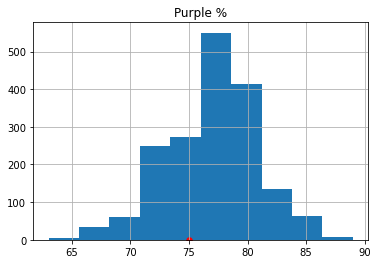

In [43]:
sample_simulations_df.hist("Purple %")
plt.scatter(75,0,color='red',s=30)

- this histogram depicts the number of times we get purple % for the given number of simulations
- the red dot is the value that mendel predicts for purple flowers that is 75%

#### Question 6
- Yes with this we can prove mendals hypothesis
- that is we cannot reject mendal's hypothesis i.e the Null hypothesis since our observed red dot is with the significant are of the histogram

## Part B (tTest using p-value method)

In [1]:
# H0 : mu = 60
# Ha : mu != 60
n = 30
dof = n-1
xbar = 65.1
mu = 60
sigma = 13.46
alpha = 0.05

In [4]:
t = (xbar-mu)/(sigma/np.sqrt(n))
t

2.075323211943792

In [11]:
# since it is a two tailed test
p_val = 2*(1-st.t.cdf(abs(t), dof))
p_val

0.046932092328964004

In [12]:
if(p_val>alpha):
    print('Null Hypo cannot be rejected')
else:
    print('Reject Null Hypo')

Reject Null Hypo
